<img src="Logos/logo_general.jpg" width="400px">

# Supplementary # - subtitle
**Title**

Author: [Jorge Lizarazo](https://www.researchgate.net/profile/Jorge-Lizarazo-Borrero?ev=hdr_xprf)

Field datasets often include nests discovered mid-cycle (e.g., already with nestlings), making exact age hard to infer. To avoid discarding such data, we use the subset with verified ages—from daily checks or hatch dates—to learn the empirical relationship between nestling mass and tarsus and then reconstruct ages for records missing days after hatching. This increases the number of analyzable records for comparative descriptions of incubation, hatching, growth, and nestling periods in three species (*M. miniatus*, *M. melanocephalus*, *M. ornatus*).


**Year:** 2025

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Setup and data

In [46]:
file_path = "Growth_rates/melanochephalus_growth.csv"
file_path2 = "Growth_rates/miniatus_growth.csv"
file_path3 = "Growth_rates/ornatus_growth.csv"
#
mela = pd.read_csv(file_path)
mini = pd.read_csv(file_path2)
orna = pd.read_csv(file_path2)

In [47]:
mela.head(20)

,Año,Familia,Especie,Elevacion,Edad,Polluelo_Masa_g,Polluelo_Tarso_mm,Polluelo_Ala_mm,Polluelo_Pico_mm,Polluelo_Cola_mm,Temp_inicial,Temp_final,Temp_ambiente
0,2008,Parulidae,Myioborus_melanocephalus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,Parulidae,Myioborus_melanocephalus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,Parulidae,Myioborus_melanocephalus,NaN,NaN,5.00,12.5,8.0,NaN,NaN,NaN,NaN,NaN
3,2008,Parulidae,Myioborus_melanocephalus,NaN,NaN,6.50,10.0,26.0,NaN,NaN,NaN,NaN,NaN
4,2013,Parulidae,Myioborus_melanocephalus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013,Parulidae,Myioborus_melanocephalus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009,Parulidae,Myioborus_melanocephalus,1949.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2009,Parulidae,Myioborus_melanocephalus,1949.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2008,Parulidae,Myioborus_melanocephalus,2263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2008,Parulidae,Myioborus_melanocephalus,2263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dession Tree Miniatus


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Data and Variables
For each species table, we used:
Target: Edad (age in days).
Predictors: Polluelo_Masa_g (mass, g) and Polluelo_Tarso_mm (tarsus, mm).
All three columns were coerced to numeric; rows with non-numeric entries became NaN.

In [49]:
cols = ['Edad', 'Polluelo_Masa_g', 'Polluelo_Tarso_mm']
mini_clean = mini[cols].dropna()

In [50]:
print(f"Filas disponibles después de limpiar NaN: {len(mini_clean)}")

Filas disponibles después de limpiar NaN: 232


Modeling Strategy

Training subset (trusted ages): We restricted model fitting to rows where Edad, Polluelo_Masa_g, and Polluelo_Tarso_mm were all present.

Model: Decision Tree Regressor (scikit-learn) with max_depth = 3 and random_state = 42.

Rationale: simple, interpretable, robust with modest sample sizes, and captures non-linear splits (useful for growth patterns).

Evaluation: Train/test split (species-specific test proportions), reporting RMSE, MAE, and R² on the held-out test set.

In [51]:
# --- 3. Definir variables predictoras (X) y variable objetivo (y) ---
X = mini_clean[['Polluelo_Masa_g', 'Polluelo_Tarso_mm']]
y = mini_clean['Edad']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

In [53]:
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [54]:
y_pred = tree.predict(X_test)

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [56]:
print("\n📊 Evaluación del modelo (Myioborus miniatus):")
print(f"  RMSE: {rmse:.3f}")
print(f"  MAE:  {mae:.3f}")
print(f"  R²:   {r2:.3f}")


📊 Evaluación del modelo (Myioborus miniatus):
  RMSE: 1.011
  MAE:  0.796
  R²:   0.841


Held-out performance (this study):

Myioborus miniatus: RMSE = 1.011 d, MAE = 0.796 d, R² = 0.841.
below you can see...
Myioborus melanocephalus: RMSE = 1.275 d, MAE = 1.250 d, R² = 0.935.

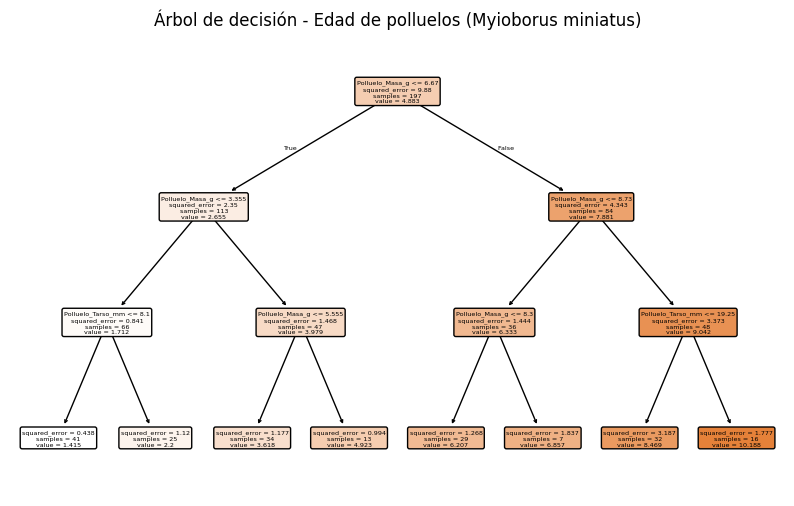

In [57]:
plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=['Polluelo_Masa_g', 'Polluelo_Tarso_mm'],
          filled=True, rounded=True)
plt.title("Árbol de decisión - Edad de polluelos (Myioborus miniatus)")
plt.show()

### Imputation Policy (Reconstruction of Missing Ages)

After training per species, we only imputed age for rows that met both conditions:

Edad is missing, and

both predictors were present (Polluelo_Masa_g and Polluelo_Tarso_mm not NaN).

Predicted ages were written directly into Edad, using half-up rounding to integer days (e.g., 1.5→2; 1.6→2). Each imputed row was flagged with:

predicted = True (otherwise False), enabling sensitivity analyses that include or exclude imputed ages.

(If used) imputation_source documenting the species/model used.

Species-level outputs were saved as:

Growth_rates/miniatus_pred.csv

Growth_rates/melanocephalus_pred.csv
(Each file preserves all original columns plus provenance flags.)

In [58]:
mini['Edad'] = pd.to_numeric(mini['Edad'], errors='coerce')
mini['Polluelo_Masa_g'] = pd.to_numeric(mini['Polluelo_Masa_g'], errors='coerce')
mini['Polluelo_Tarso_mm'] = pd.to_numeric(mini['Polluelo_Tarso_mm'], errors='coerce')


In [59]:
mini_pred = mini.copy()

# Filas donde falta Edad pero sí hay predictores
mask_pred = mini_pred['Edad'].isna() & mini_pred[['Polluelo_Masa_g','Polluelo_Tarso_mm']].notna().all(axis=1)

# Predicción para esas filas
pred_vals = tree.predict(mini_pred.loc[mask_pred, ['Polluelo_Masa_g','Polluelo_Tarso_mm']])

# (Opcional) redondeo: a 1 decimal o a entero si tu Edad es en días enteros
pred_vals = np.round(pred_vals, 1)   # usa np.rint(pred_vals).astype(int) si quieres enteros

# Escribir las predicciones directamente en la columna Edad (solo donde faltaba)
mini_pred.loc[mask_pred, 'Edad'] = pred_vals

# Columna booleana que indica si la Edad fue imputada por el modelo
mini_pred['predicted'] = False
mini_pred.loc[mask_pred, 'predicted'] = True

In [60]:
print("Filas imputadas:", mask_pred.sum())
print(mini_pred.loc[mask_pred, ['Edad','Polluelo_Masa_g','Polluelo_Tarso_mm','predicted']].head())


Filas imputadas: 243
   Edad  Polluelo_Masa_g  Polluelo_Tarso_mm  predicted
3   1.4             1.66                6.5       True
5   1.4             2.25                7.6       True
6   1.4             1.52                6.5       True
7   2.2             3.21                8.9       True
8   1.4             1.96                6.8       True


In [61]:
mini_pred

,Año,Familia,Especie,Elevacion,Edad,Polluelo_Masa_g,Polluelo_Tarso_mm,Polluelo_Ala_mm,Polluelo_Pico_mm,Polluelo_Cola_mm,Temp_inicial,Temp_final,Temp_ambiente,predicted
0,2015,Parulidae,Myioborus_miniatus,2034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2015,Parulidae,Myioborus_miniatus,2040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2015,Parulidae,Myioborus_miniatus,2040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2015,Parulidae,Myioborus_miniatus,2040,1.4,1.66,6.5,5.6,2.7,NaN,NaN,NaN,NaN,True
4,2015,Parulidae,Myioborus_miniatus,2040,NaN,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,2015,Parulidae,Myioborus_miniatus,1563,8.0,8.40,13.7,31.3,3.7,5.7,37.94,37.122,19.95,False
747,2015,Parulidae,Myioborus_miniatus,1563,11.0,9.51,16.2,39.6,3.7,13.1,38.11,37.002,21.04,False
748,2015,Parulidae,Myioborus_miniatus,1563,11.0,8.81,14.5,40.5,4.3,11.6,37.91,37.120,21.04,False
749,2016,Parulidae,Myioborus_miniatus,1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [63]:
mask_pred = (
    mini_pred.get('predicted', False).astype(str).str.lower().isin(['true', 't', '1'])
    & mini_pred['Edad'].notna()
)
mini_pred.loc[mask_pred, 'Edad'] = np.floor(mini_pred.loc[mask_pred, 'Edad'] + 0.5)
mini_pred['Edad'] = mini_pred['Edad'].astype('Int64')

In [82]:
mini_pred.head()


,Año,Familia,Especie,Elevacion,Edad,Polluelo_Masa_g,Polluelo_Tarso_mm,Polluelo_Ala_mm,Polluelo_Pico_mm,Polluelo_Cola_mm,Temp_inicial,Temp_final,Temp_ambiente,predicted
0,2015,Parulidae,Myioborus_miniatus,2034,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2015,Parulidae,Myioborus_miniatus,2040,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2015,Parulidae,Myioborus_miniatus,2040,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2015,Parulidae,Myioborus_miniatus,2040,1,1.66,6.5,5.6,2.7,NaN,NaN,NaN,NaN,True
4,2015,Parulidae,Myioborus_miniatus,2040,<NA>,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


## Decission tree Melanocephalus

In [83]:
mela.head()

,Año,Familia,Especie,Elevacion,Edad,Polluelo_Masa_g,Polluelo_Tarso_mm,Polluelo_Ala_mm,Polluelo_Pico_mm,Polluelo_Cola_mm,Temp_inicial,Temp_final,Temp_ambiente
0,2008,Parulidae,Myioborus_melanocephalus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,Parulidae,Myioborus_melanocephalus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,Parulidae,Myioborus_melanocephalus,NaN,NaN,5.0,12.5,8.0,NaN,NaN,NaN,NaN,NaN
3,2008,Parulidae,Myioborus_melanocephalus,NaN,NaN,6.5,10.0,26.0,NaN,NaN,NaN,NaN,NaN
4,2013,Parulidae,Myioborus_melanocephalus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
mela_clean = mela[cols].dropna()

In [67]:
print(f"Filas disponibles después de limpiar NaN: {len(mela_clean)}")

Filas disponibles después de limpiar NaN: 16


In [68]:
X = mela_clean[['Polluelo_Masa_g', 'Polluelo_Tarso_mm']]
y = mela_clean['Edad']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [74]:
y_pred = tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n📊 Evaluación del modelo (Myioborus melanocephalus):")
print(f"  RMSE: {rmse:.3f}")
print(f"  MAE:  {mae:.3f}")
print(f"  R²:   {r2:.3f}")


📊 Evaluación del modelo (Myioborus melanocephalus):
  RMSE: 1.275
  MAE:  1.250
  R²:   0.935


In [75]:
mela['Edad'] = pd.to_numeric(mela['Edad'], errors='coerce')
mela['Polluelo_Masa_g'] = pd.to_numeric(mela['Polluelo_Masa_g'], errors='coerce')
mela['Polluelo_Tarso_mm'] = pd.to_numeric(mela['Polluelo_Tarso_mm'], errors='coerce')

mela_pred = mela.copy()

# Filas donde falta Edad pero sí hay predictores
mask_pred = mela_pred['Edad'].isna() & mela_pred[['Polluelo_Masa_g', 'Polluelo_Tarso_mm']].notna().all(axis=1)

# Predicción para esas filas
pred_vals = tree.predict(mela_pred.loc[mask_pred, ['Polluelo_Masa_g', 'Polluelo_Tarso_mm']])

# (Opcional) redondeo: a 1 decimal o a entero si tu Edad es en días enteros
pred_vals = np.round(pred_vals, 1)  # usa np.rint(pred_vals).astype(int) si quieres enteros

# Escribir las predicciones directamente en la columna Edad (solo donde faltaba)
mela_pred.loc[mask_pred, 'Edad'] = pred_vals

# Columna booleana que indica si la Edad fue imputada por el modelo
mela_pred['predicted'] = False
mela_pred.loc[mask_pred, 'predicted'] = True
print("Filas imputadas:", mask_pred.sum())
print(mela_pred.loc[mask_pred, ['Edad', 'Polluelo_Masa_g', 'Polluelo_Tarso_mm', 'predicted']].head())



Filas imputadas: 6
    Edad  Polluelo_Masa_g  Polluelo_Tarso_mm  predicted
2    4.0             5.00               12.5       True
3    4.0             6.50               10.0       True
10   5.0             8.25               16.0       True
11   5.0             7.45               17.0       True
17   4.0             5.30               11.0       True


In [81]:
mela_pred.head()


,Año,Familia,Especie,Elevacion,Edad,Polluelo_Masa_g,Polluelo_Tarso_mm,Polluelo_Ala_mm,Polluelo_Pico_mm,Polluelo_Cola_mm,Temp_inicial,Temp_final,Temp_ambiente,predicted
0,2008,Parulidae,Myioborus_melanocephalus,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2008,Parulidae,Myioborus_melanocephalus,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2008,Parulidae,Myioborus_melanocephalus,NaN,4,5.0,12.5,8.0,NaN,NaN,NaN,NaN,NaN,True
3,2008,Parulidae,Myioborus_melanocephalus,NaN,4,6.5,10.0,26.0,NaN,NaN,NaN,NaN,NaN,True
4,2013,Parulidae,Myioborus_melanocephalus,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [79]:
mask_pred = (
    mela_pred.get('predicted', False).astype(str).str.lower().isin(['true', 't', '1'])
    & mela_pred['Edad'].notna()
)
mela_pred.loc[mask_pred, 'Edad'] = np.floor(mela_pred.loc[mask_pred, 'Edad'] + 0.5)
mela_pred['Edad'] = mela_pred['Edad'].astype('Int64')

In [80]:
mini_pred.to_csv("Growth_rates/miniatus_pred.csv", index=False)
mela_pred.to_csv("Growth_rates/melanocephalus_pred.csv", index=False)